In [2]:
def line_intersection(start1, end1, start2, end2):
    # Get the parameters of the lines
    x1, y1 = start1
    x2, y2 = end1
    x3, y3 = start2
    x4, y4 = end2

    # Calculate the denominator
    denominator = ((y4 - y3) * (x2 - x1)) - ((x4 - x3) * (y2 - y1))

    # If the denominator is zero, the lines are parallel
    if denominator == 0:
        return None

    # Calculate the numerator
    numerator1 = ((x4 - x3) * (y1 - y3)) - ((y4 - y3) * (x1 - x3))
    numerator2 = ((x2 - x1) * (y1 - y3)) - ((y2 - y1) * (x1 - x3))

    # Calculate the parameters of the intersection point
    r = numerator1 / denominator
    s = numerator2 / denominator

    # Check if the intersection point is on the line segments
    if (r > 0 and r < 1) and (s > 0 and s < 1):
        # Calculate the intersection point
        x = x1 + (r * (x2 - x1))
        y = y1 + (r * (y2 - y1))
        return (x, y)

    # The lines do not intersect
    return None  

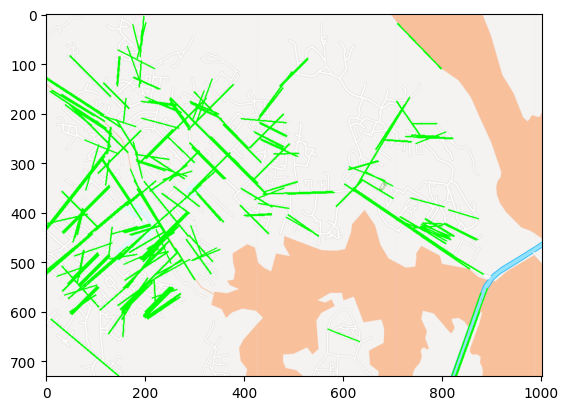

NameError: name 'line_intersection' is not defined

In [1]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the Google Maps screenshot
image = cv2.imread("./rad.png")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform edge detection using Canny
edges = cv2.Canny(gray, 50, 150)

# Find the lines in the image using HoughLinesP
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100,
                        minLineLength=50, maxLineGap=10)

# Plot the edges on the original image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Plot the image
plt.imshow(image)
plt.show()

# Create a graph data structure to represent the road network
graph = {}

# Iterate through each line to find the intersecting points
for line1 in lines:
    x1_1, y1_1, x1_2, y1_2 = line1[0]

    # Get the start and end points of the line
    start1 = (x1_1, y1_1)
    end1 = (x1_2, y1_2)

    for line2 in lines:
        x2_1, y2_1, x2_2, y2_2 = line2[0]

        # Get the start and end points of the line
        start2 = (x2_1, y2_1)
        end2 = (x2_2, y2_2)

        # Check if the lines intersect
        intersect = line_intersection(start1, end1, start2, end2)
        if intersect:
            # Add the intersecting point as a node in the graph
            node = intersect
            if node not in graph:
                graph[node] = []

            # Add the edge between the intersecting points
            length = np.sqrt((x2_2 - x2_1)**2 + (y2_2 - y2_1)**2)
            graph[node].append((intersect, length))

# The graph data structure represents the road network
print(graph)
